## KONLPY란?

- 한국어 정보처리를 위한 파이썬 패키지
- 관련정보: https://konlpy.org/ko/latest/index.html

### 1) 코랩설치

```bash
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

%env JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"
```

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [742 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelea

In [ ]:
%env JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


## 한국어 말뭉치

- 헌법 말뭉치: kolaw
- 국회법안 말뭉치: kobill

In [ ]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [ ]:
c = kolaw.open('constitution.txt').read()
print(c[:100])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


In [ ]:
from konlpy.corpus import kobill
kobill.fileids()

['1809893.txt',
 '1809896.txt',
 '1809898.txt',
 '1809895.txt',
 '1809899.txt',
 '1809891.txt',
 '1809897.txt',
 '1809890.txt',
 '1809894.txt',
 '1809892.txt']

In [ ]:
d = kobill.open('1809894.txt').read()
print(d[:100])

고등교육법 일부개정법률안

(안상수의원 대표발의 )

 의 안
 번 호

9894

발의연월일 : 2010.  11.  15.

발  의  자 : 안상수․김정훈․원희목 

강석호․


## 형태소 분석

KoNLPy는 다음과 같은 형태소분석, 태깅 라이브러리를 제공

- Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.
  - http://semanticweb.kaist.ac.kr/hannanum/
- Kkma: 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
  - http://kkma.snu.ac.kr/
- Komoran: 코모란. Shineware에서 개발.
  - https://github.com/shin285/KOMORAN
- Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.
  - https://bitbucket.org/eunjeon/mecab-ko
- Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
  - https://github.com/open-korean-text/open-korean-text

In [ ]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

In [ ]:
print(hannanum.nouns(c[:100]))
print(kkma.nouns(c[:100]))
print(komoran.nouns(c[:100]))
print(okt.nouns(c[:100]))

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동', '건립', '대한민국임시정부', '법통', '불의', '항거', '4·19민주이념', '계승', '조국', '민주개혁', '평화적', '통일']
['대한', '대한민국', '대한민국헌법', '민국', '헌법', '유구', '역사', '전통', '우리', '국민', '3', '1', '1운동', '운동', '건립', '대한민국임시정부', '임시', '정부', '법통', '불의', '항거', '4', '19', '19민주이념', '민주', '이념', '계승', '조국', '민주개혁', '개혁', '평화적', '통일']
['대한민국', '헌법', '역사', '전통', '국민', '운동', '건립', '대한민국', '임시', '정부', '법통', '불의', '항거', '민주', '이념', '계승', '조국', '민주개혁', '평화', '통일']
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일']


In [ ]:
print(hannanum.morphs(c[:100]))
print(kkma.morphs(c[:100]))
print(komoran.morphs(c[:100]))
print(okt.morphs(c[:100]))

['대한민국헌법', '유구', '하', 'ㄴ', '역사', '와', '전통', '에', '빛', '나는', '우리', '대한국민', '은', '3·1운동', '으로', '건립', '되', 'ㄴ', '대한민국임시정부', '의', '법통', '과', '불의', '에', '항거', '하', 'ㄴ', '4·19민주이념', '을', '계승', '하고', ',', '조국', '의', '민주개혁', '과', '평화적', '통일', '의']
['대한민국', '헌법', '유구', '하', 'ㄴ', '역사', '와', '전통', '에', '빛나', '는', '우리', '대하', 'ㄴ', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '되', 'ㄴ', '대한민국', '임시', '정부', '의', '법통', '과', '불의', '에', '항거', '하', 'ㄴ', '4', '·', '19', '민주', '이념', '을', '계승', '하', '고', ',', '조국', '의', '민주', '개혁', '과', '평화적', '통일', '의']
['대한민국', '헌법', '유구', '하', 'ㄴ', '역사', '와', '전통', '에', '빛나', '는', '우리', '대하', 'ㄴ', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '되', 'ㄴ', '대한민국', '임시', '정부', '의', '법통', '과', '불의', '에', '항거', '하', 'ㄴ', '4', '·', '19', '민주', '이념', '을', '계승', '하', '고', ',', '조국', '의', '민주개혁', '과', '평화', '적', '통일', '의']
['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국', '임시정부', '의', '법', '통과', '불의

In [ ]:
print(hannanum.pos(c[:100]))
print(kkma.pos(c[:100]))
print(komoran.pos(c[:100]))
print(okt.pos(c[:100]))

[('대한민국헌법', 'N'), ('유구', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('역사', 'N'), ('와', 'J'), ('전통', 'N'), ('에', 'J'), ('빛', 'N'), ('나는', 'J'), ('우리', 'N'), ('대한국민', 'N'), ('은', 'J'), ('3·1운동', 'N'), ('으로', 'J'), ('건립', 'N'), ('되', 'X'), ('ㄴ', 'E'), ('대한민국임시정부', 'N'), ('의', 'J'), ('법통', 'N'), ('과', 'J'), ('불의', 'N'), ('에', 'J'), ('항거', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('4·19민주이념', 'N'), ('을', 'J'), ('계승', 'N'), ('하고', 'J'), (',', 'S'), ('조국', 'N'), ('의', 'J'), ('민주개혁', 'N'), ('과', 'J'), ('평화적', 'N'), ('통일', 'N'), ('의', 'J')]
[('대한민국', 'NNG'), ('헌법', 'NNG'), ('유구', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('역사', 'NNG'), ('와', 'JC'), ('전통', 'NNG'), ('에', 'JKM'), ('빛나', 'VV'), ('는', 'ETD'), ('우리', 'NNM'), ('대하', 'VV'), ('ㄴ', 'ETD'), ('국민', 'NNG'), ('은', 'JX'), ('3', 'NR'), ('·', 'SP'), ('1', 'NR'), ('운동', 'NNG'), ('으로', 'JKM'), ('건립', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETD'), ('대한민국', 'NNG'), ('임시', 'NNG'), ('정부', 'NNG'), ('의', 'JKG'), ('법통', 'NNG'), ('과', 'JC'), ('불의', 'NNG'), ('에', 'JKM'), ('항거', 'NNG'), ('하', 'XS

## 네이버 카페 여행 크롤링데이터 분석하기

네이버 카페 여행 크롤링 데이터 및 font 다운로드: https://url.kr/i7l8ct

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 66 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (25.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [ ]:
f = open('/content/drive/MyDrive/dataAnalysis/data/tour.txt', 'r')
txt = f.read()
f.close()
print(txt)

베트남 <b>여행</b> 입국 , 비자 알아볼때는 손오공 !! 해외<b>여행</b>을 계획하면 티켓팅을 하면서부터 설레임이 시작되잖아요 하노이 공항에서 시내 가기전 낯선땅에 도착하면 언어적인 부분도 있고 문화를 잘 모르다보니... 그래도 나름 열심히 살아온 제 자신에게 보상으로 <b>여행</b>을 선물하고 싶더라고요. 그래서 동생을 꼬신 다음 같이 떠나게 됐어요. 오늘은 1일차 <b>여행</b>기와 함께 이번에 묵은 제주 가족<b>여행</b> 숙소 메종 글래드... 스페인 <b>여행</b> 일정이 고민인 분들을 위해 제가 다녀왔던 루트 공유할게요. 바르셀로나 <b>여행</b>을 시작으로 마드리드, 그라나다, 세비야 순서대로 갔었어요. 항공권은 바르셀로나 인 마드리드 아웃 여정으로... 신혼 <b>여행</b> 커플 숙소로 좋을 것 같은 제주 펜션을 만났다. 자연과 함께할 수 있어 사계절 아름다운... 제주도<b>여행</b>을 하면 주로 렌트하는 전기차 충전소가 우리가 머문 독채 'Modern Vill'라는 제주 커플 숙소... 우도 <b>여행</b>을 다녀왔습니다. 일박을 하며 서빈백사를 시작으로 비양도와 하고수동 해수욕장까지 고루 둘러보고 저녁에는 일몰과 야경까지 감상하며 우도의 아름다움을 만끽했습니다. 오늘은 그 <b>여행</b> 후기를... 경주 호텔 켄싱턴리조트 가족<b>여행</b> 숙소 추천 천년고도 경주의 찬란함이 이맘때처럼 빛나는 계절도... 가족<b>여행</b>이었습니다. 벚꽃보다 먼저 봄을 알려주는 목련과 산수유가 곳곳에서 반갑게 맞아주었는데요.... 고성 <b>여행</b> 절 해변 강원도 <b>여행</b>지 드라이브 코스 강원도 1박 2일 <b>여행</b> 중 하루를 고성 이곳저곳을 다녔습니다. 처음으로 가본 고성절 건봉사부터 무지개색 방호벽이 있는 고성해변 아야진 등 차를 타고 다니며... 힐튼 경주 작년 봄부터 벼르던 힐튼 경주 벚꽃<b>여행</b>! 3월30일-4월1일 <b>여행</b>다녀왔어요 22년 기준으론 성공적.. 작년엔 이시기에 

In [ ]:
from konlpy.tag import Okt

okt = Okt()

list_data = okt.nouns(txt)
list_data

['베트남',
 '여행',
 '입국',
 '비자',
 '때',
 '손오공',
 '해외',
 '여행',
 '계획',
 '티켓팅',
 '부터',
 '설레임',
 '시작',
 '하노이',
 '공항',
 '시내',
 '낯선',
 '땅',
 '도착',
 '언어',
 '부분',
 '문화',
 '나름',
 '제',
 '자신',
 '보상',
 '여행',
 '선물',
 '동생',
 '꼬신',
 '다음',
 '오늘',
 '여행',
 '기와',
 '이번',
 '제주',
 '가족',
 '여행',
 '숙소',
 '메종',
 '글래드',
 '스페인',
 '여행',
 '일정',
 '고민',
 '분',
 '위해',
 '제',
 '루트',
 '공유',
 '바르셀로나',
 '여행',
 '시작',
 '마드리드',
 '그라나다',
 '세비야',
 '순서대로',
 '항공권',
 '바르셀로나',
 '인',
 '마드리드',
 '아웃',
 '여정',
 '신혼',
 '여행',
 '커플',
 '숙소',
 '것',
 '제주',
 '펜션',
 '자연',
 '수',
 '사계절',
 '제주도',
 '여행',
 '주로',
 '렌트',
 '전기차',
 '충전',
 '소가',
 '우리',
 '독채',
 '제주',
 '커플',
 '숙소',
 '우도',
 '여행',
 '일박',
 '서빈',
 '백사',
 '시작',
 '비양도',
 '수동',
 '해수욕장',
 '고루',
 '저녁',
 '일몰',
 '야경',
 '감상',
 '우도',
 '움',
 '만끽',
 '오늘',
 '그',
 '여행',
 '후기',
 '경주',
 '호텔',
 '켄싱턴',
 '리조트',
 '가족',
 '여행',
 '숙소',
 '추천',
 '천년',
 '고도',
 '경주',
 '처럼',
 '계절',
 '가족',
 '여행',
 '벚꽃',
 '먼저',
 '봄',
 '목련',
 '산수유',
 '곳곳',
 '고성',
 '여행',
 '절',
 '해변',
 '강원도',
 '여행',
 '드라이브',
 '코스',
 '강원도',
 '박',
 '여행',
 '중',
 '하루'

In [ ]:
list_data1 = ' '.join(list_data)
list_data1

'베트남 여행 입국 비자 때 손오공 해외 여행 계획 티켓팅 부터 설레임 시작 하노이 공항 시내 낯선 땅 도착 언어 부분 문화 나름 제 자신 보상 여행 선물 동생 꼬신 다음 오늘 여행 기와 이번 제주 가족 여행 숙소 메종 글래드 스페인 여행 일정 고민 분 위해 제 루트 공유 바르셀로나 여행 시작 마드리드 그라나다 세비야 순서대로 항공권 바르셀로나 인 마드리드 아웃 여정 신혼 여행 커플 숙소 것 제주 펜션 자연 수 사계절 제주도 여행 주로 렌트 전기차 충전 소가 우리 독채 제주 커플 숙소 우도 여행 일박 서빈 백사 시작 비양도 수동 해수욕장 고루 저녁 일몰 야경 감상 우도 움 만끽 오늘 그 여행 후기 경주 호텔 켄싱턴 리조트 가족 여행 숙소 추천 천년 고도 경주 처럼 계절 가족 여행 벚꽃 먼저 봄 목련 산수유 곳곳 고성 여행 절 해변 강원도 여행 드라이브 코스 강원도 박 여행 중 하루 고성 곳 곳 처음 고성 절 건봉사 무지개 색 방호벽 고성 해변 아야 진 등 차 타고 힐튼 경주 작년 봄 벼르던 힐튼 경주 벚꽃 여행 여행 기준 성공 작년 시기 더 개 올해 이틀 예전 한번 때 온돌방 베트남 나트랑 자유 여행 다시 수 날 온 것 베트남 여행 후 귀국 시 자가 격리 면제 검사 저 베트남 태국 여행 준비 출국 시 제외 여행 블로거 말 해외 입국 자가 격리 면제 후 분 다시 계획 저 항상 발 먼저 제주도 힐링 여행 사려 숲길 산책 코스 힐링 여행 제주도 힐링 산책 수 호호 다른 곳 관심 여기 단 곳 사려 숲길 무 격리 해외 여행 국가 입국 가능 베트남 태국 그동안 국내 여행 위주 로만 사람 수요 외국 경우 각종 규제 때문 해도 한국 최소 열흘 자가 격리 유럽 여행 네덜란드 여행 암스테르담 쾨겐 호프 튤립축제 글 사진 그루터기 해외 여행 길이 리기 시작 여행 본능 유럽 여행 곳 태안 여행 태안 로컬 푸드 직매 장보기 주말 태안 여행 룰루 룰루 급 가게 정 그냥 애 쥬라기 박물관 쥬라기 박물관 출발 애 주제 별 세계 여행 네덜란드 여행 중 당일치기 잔담 사실 네덜란드 자체 경유

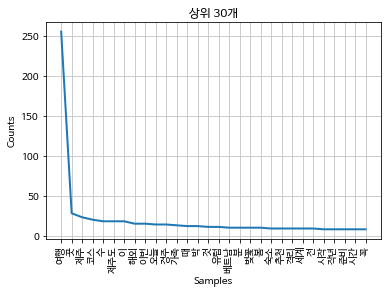

In [ ]:
from nltk import Text
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='NanumBarunGothic')

reg_tokenize = RegexpTokenizer('[\w]+')
text = Text(reg_tokenize.tokenize(list_data1))
plt.title('상위 30개')
text.plot(30)
plt.show()

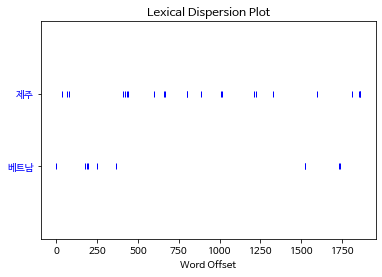

In [ ]:
text.dispersion_plot(['제주', '베트남'])

In [ ]:
# konlpy를 가지고 명사로 추출된 리스트를 dict형태로 변경
word_count = {}
for temp in list_data:
  if temp in word_count:
    word_count[temp] += 1
  else:
    word_count[temp] = 1

word_count

{'가게': 1,
 '가고시마': 2,
 '가기': 2,
 '가능': 2,
 '가능성': 1,
 '가면': 2,
 '가설': 1,
 '가성': 1,
 '가세': 1,
 '가야': 1,
 '가을': 1,
 '가장': 4,
 '가족': 13,
 '가지': 1,
 '가파도': 7,
 '각종': 1,
 '간': 3,
 '간사이': 2,
 '갈대': 1,
 '갈치': 1,
 '감상': 1,
 '감회': 1,
 '갑자기': 1,
 '강': 2,
 '강릉': 8,
 '강원도': 5,
 '강진': 2,
 '개': 2,
 '개국': 2,
 '개월': 2,
 '개인': 2,
 '객': 4,
 '거': 4,
 '거란': 1,
 '거리': 1,
 '거의': 1,
 '거제': 1,
 '거제도': 3,
 '거제시': 2,
 '건': 4,
 '건봉사': 1,
 '건축': 1,
 '걷기': 1,
 '걸': 2,
 '검사': 1,
 '검색': 1,
 '것': 11,
 '겨울': 2,
 '격리': 9,
 '결심': 1,
 '겸': 2,
 '경내': 1,
 '경비': 2,
 '경상북도': 1,
 '경우': 2,
 '경유': 1,
 '경주': 14,
 '경주로': 1,
 '경험': 1,
 '계절': 1,
 '계해': 1,
 '계획': 7,
 '고도': 1,
 '고려대학교': 1,
 '고루': 1,
 '고민': 2,
 '고베': 2,
 '고성': 4,
 '고양시': 1,
 '고향': 1,
 '골': 1,
 '골퍼': 1,
 '골프': 2,
 '골프장': 1,
 '곰돌이': 1,
 '곳': 28,
 '곳곳': 1,
 '공기': 1,
 '공원': 2,
 '공유': 1,
 '공포': 1,
 '공항': 2,
 '과': 1,
 '과정': 1,
 '관계': 1,
 '관광': 1,
 '관광버스': 1,
 '관광지': 6,
 '관람': 1,
 '관심': 1,
 '광양': 1,
 '교통': 1,
 '교통비': 2,
 '구': 1,
 '구경': 4,
 '구매': 2,
 '구속': 1,
 '구원': 1,
 '구입':

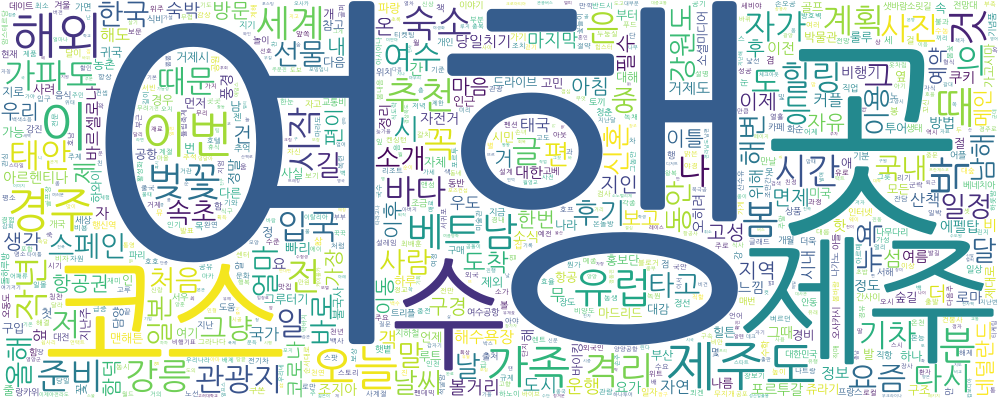

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(
  font_path='/content/drive/MyDrive/dataAnalysis/data/NanumGothic.ttf',
  background_color='white',
  width=1000,
  height=400,
  max_font_size=500,
  max_words=1000
)

cloud = wc.generate_from_frequencies(word_count)
cloud.to_image()